# Key Topics from Probability and Statistics

## What is probability?  

Classical view arose from gambling with dice and holds that outcomes have equal probabilty.  

Subjective view uses a model with randomness such as the payoff to a particular gamble.  

Frequentist view holds that probability is based on the history of outcomes from an experiment, such as the probability the stock market goes up tomorrow or P(stock market goes up tomorrow).

## Components of an Experiment

### Sample space, $S$, which is the set of all possible outcomes.

Examples: 

1. Flipping a US penny, $S=\{Heads,Tails\}$

2. Throwing a die, $S=\{1,2,3,4,5,6\}$

3. Throwing two dice, $S=\{i,j\}: i,j=1,2,3,4,5,6$

### Events, $A$, which are any subset of $S$

Examples: 

1. $Heads$ from $\{Heads,Tails\}$

2. $2$ from $\{1,2,3,4,5,6\}$

### Probability 

$P: A\rightarrow[0,1]$ or $P(A)$

## Properites of Probability

1. The probability of an event occuring lies between 0 and 1: $P(A)\in[0,1]$

2. The probability of the sample space occurring is 1: $P(S)=1$

3. Summation: $P(A \bigcup B) = P(A) + P(B)$ for independent events

4. Conditioning: $P(A|B) = P(A)$ for independent events

5. Complimentary: $P(A^c) = 1-P(A)$

# Random Variables

We operationalize all of this stuff through the use of Random Variables (both discrete and continuous) and examine important characteristics of these animals (moments) such as mean, variance (standard error), and correlation (when we have more than one RV).

## Examples of Discrete RVs
The experiment is to toss a coin 25 times.  The random variable is the outcome, $\{Heads, Tails\}$, from which we can calculate a mean and a standard deviation.

The experiment is toss two dice 10 times.  The random variables are the outcomes of each toss, from which we can calculate a mean, a standard deviation, and a correlation.  Technically, this is a binomial random variable (multiple experiments of a single Bernoulli trial).

Let's make this practical and do some statistical computing.

In [1]:
import numpy as np
from numpy import random

In [2]:
coin = random.random_integers(0, 1, 25)
print coin

[0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1 1]


In [3]:
print coin.mean(), coin.std()

0.44 0.49638694584


In [4]:
die1 = random.random_integers(1, 6, 10)
die2 = random.random_integers(1, 6, 10)
print die1, die2

[3 5 2 3 4 1 1 2 6 2] [2 2 1 5 1 4 3 3 5 2]


In [5]:
print die1.mean(), die1.std(), die2.mean(), die2.std(), np.corrcoef(die1, die2)[0, 1]

2.9 1.57797338381 2.8 1.4 0.126744850105


### Other Discrete RVs

1. Multinomial (multiple outcomes, such as position A, B, C, or D).
2. Discrete uniform (roll of a die or dice).
3. Poisson (integer-valued, often used for counting, such as the number of stars or the number of visits to the doctor).

## Examples of (Important) Continuous RV

### Logistic

Cumulative Density Function

$F(x)=\displaystyle{\frac{1}{1+\exp(-x)}}$

Probability Density Function

$f(x)=F^\prime(x)=\displaystyle{\frac{\exp(-x)}{1+\exp(-x)}}$

In [6]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)

x = np.linspace(-10,10,1000)
pdf = np.exp(-x)/(1+np.exp(-x))**2
cdf = 1/(1+np.exp(-x))

Populating the interactive namespace from numpy and matplotlib


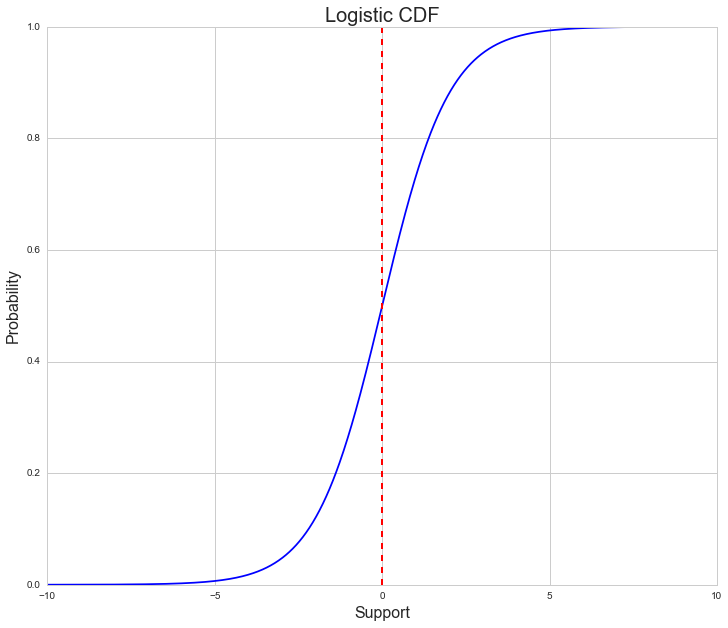

In [7]:
plt.figure(figsize = (12,10))
plt.plot(x, cdf, 'b')
plt.xlabel('Support', fontsize = 16)
plt.ylabel('Probability', fontsize = 16)
#plt.ylim((0,.3))
plt.title('Logistic CDF', fontsize = 20)
plt.axvline(0, color='r', ls='--', lw=2.0)

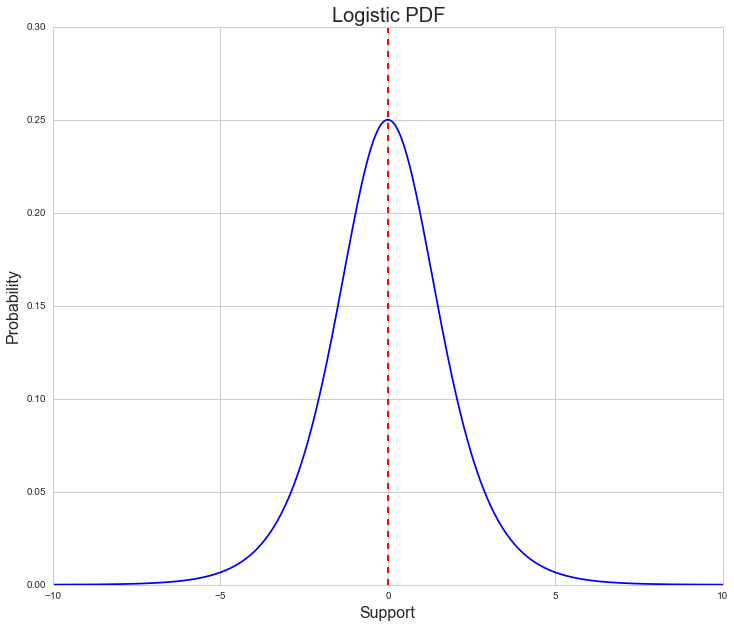

In [7]:
plt.figure(figsize = (12,10))
plt.plot(x, pdf, 'b')
plt.xlabel('Support', fontsize = 16)
plt.ylabel('Probability', fontsize = 16)
plt.ylim((0,.3))
plt.title('Logistic PDF', fontsize = 20)
plt.axvline(0, color='r', ls='--', lw=2.0)

### Mathematical Digression

The following relations can be used to show that the logistic RV meets the properties of probability.

$x^0=1 \text{ } \forall x\in\Re$

$\infty^{-1}=0$

$\exp(\infty)=\infty$

$\exp(-\infty)=0$

$\alpha^\infty=0 \text{ for } \mid\alpha\mid<1$

### Univariate Standard Normal (or Gaussian), denoted $N(0,1)$

Probability Density Function

$f(x)=\displaystyle{\frac{1}{\sqrt{2\pi}}}\exp\{-\frac{1}{2}x^2\}$

For $N(\mu,\sigma^2)$ formula is:

$f(x)=\displaystyle{\frac{1}{\sqrt{2\pi\sigma^2}}}\exp\{-\frac{1}{2\sigma^2}(x-\mu)^2\}$

In [8]:
x = np.linspace(-10,10,1000)
pdf = np.exp(-0.5*x**2)/np.sqrt(2*np.pi)

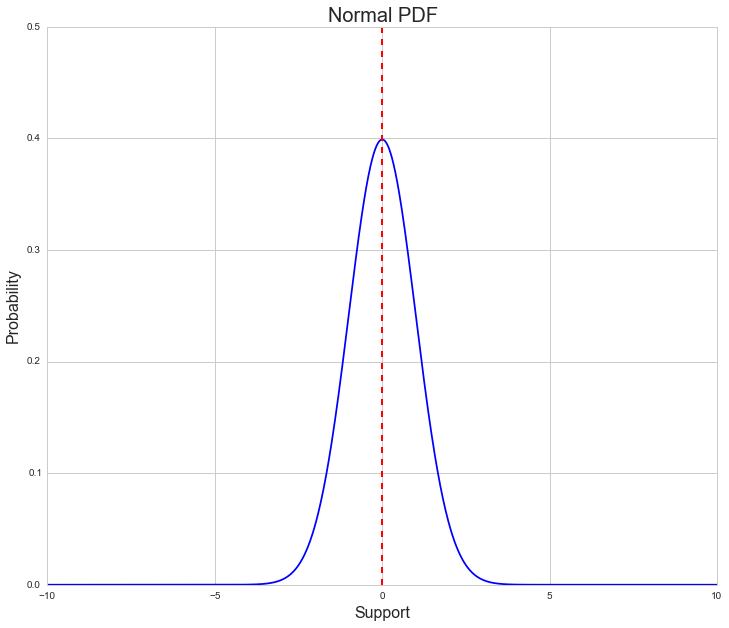

In [10]:
plt.figure(figsize = (12,10))
plt.plot(x, pdf, 'b')
plt.xlabel('Support', fontsize = 16)
plt.ylabel('Probability', fontsize = 16)
plt.ylim((0,.5))
plt.title('Normal PDF', fontsize = 20)
plt.axvline(0, color='r', ls='--', lw=2.0)

### Other Continuous RVs

1. Student's t distribution (for small-sample hypothesis testing).
2. Uniform over a range (for random number generation).
3. Chi-Squared, the square of the normal (for joint hypothesis testing).
4. Log normal, the transformation of non-negative things like wages or stock returns

### Bivariate Normal with Correlation $\rho$

See https://en.wikipedia.org/wiki/Multivariate_normal_distribution

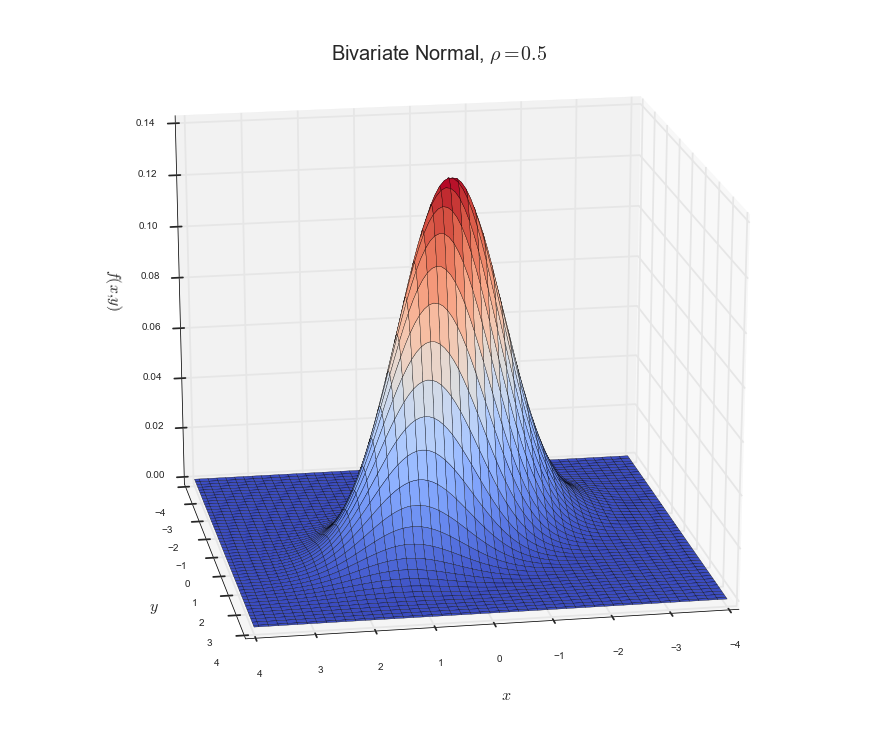

In [11]:
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

x, y = np.linspace(-4, 4, 100), np.linspace(-4, 4, 100)
x, y = np.meshgrid(x, y)
z = np.mat(np.zeros(2))
p = np.zeros(np.shape(x))
R = np.matrix([[1, 0.5],[0.5, 1]])
Rinv = linalg.inv(R)

for i in xrange(len(x)):
    for j in xrange(len(y)):
        z[0, 0] = x[i, j]
        z[0, 1] = y[i, j]
        p[i, j] = (1.0 / (2 * np.pi) * np.sqrt(linalg.det(R))) * np.exp(-(z * Rinv *z.T) / 2)

fig = plt.figure(figsize = (12, 10))
ax = Axes3D(fig)
#ax.plot_wireframe(x, y, p, rstride=3, cstride=3, color='#AD5300')
ax.plot_surface(x, y, p, rstride=2, cstride=2, cmap=cm.coolwarm, shade='interp')
#ax.plot_wireframe(x, y, p, rstride=3, cstride=3, color='black')
ax.view_init(20, 80) # rotation through 20, 40, 60, 80
ax.set_xlabel(r'$x$', fontsize = 16)
ax.set_ylabel(r'$y$', fontsize = 16)
ax.set_zlabel(r'$f(x, y)$', fontsize = 16)
ax.set_title(r'Bivariate Normal, $\rho = 0.5$', fontsize = 20)

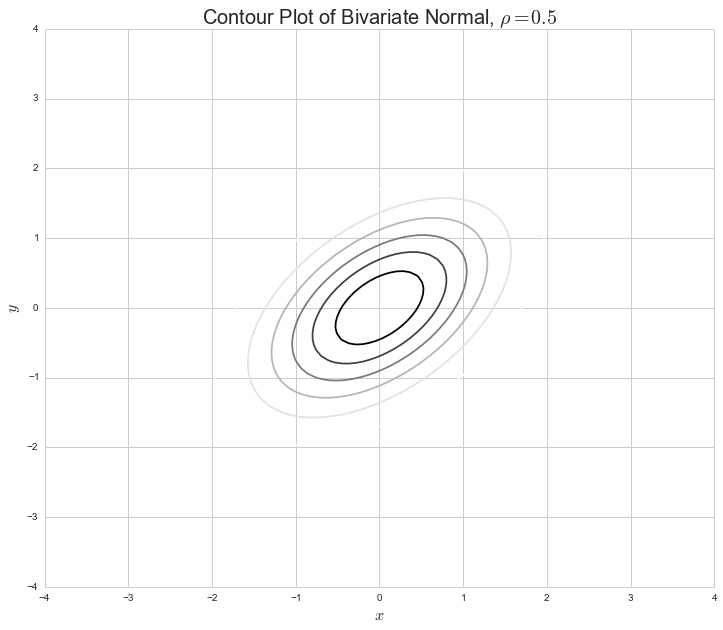

In [12]:
fig = plt.figure(figsize = (12, 10))
ax = fig.gca()
ax.contour(x, y, p)  
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.set_xlabel(r'$x$', fontsize = 16)
ax.set_ylabel(r'$y$', fontsize = 16)
ax.set_title(r'Contour Plot of Bivariate Normal, $\rho = 0.5$', fontsize = 20)

## Generating Sample Data, Important Moments, and Scatterplots

In statistical learning, we often work with strucutured data and undertake an analysis of those data.  Often this is called "dimension reduction," in that we seek to develop lower-dimensional but informative representations of the data.  (You will deal with unstructured data later in the course.)

Again, we will allow the computer to do the heavy lifting for us.  Let's start generating some random samples and playing with them.

In [9]:
ss = 1000 # Sample size of the observed data
mean = [0, 0] # Mean zero
corr = 0.5 # Correlation 0.5
R = np.matrix([[1, corr],[corr, 1]]) 
x1, x2 = np.random.multivariate_normal(mean, R, ss).T # Draw the observed data

In [10]:
print x1.mean(), x1.var(), x1.std()

0.00357204370525 0.978349155454 0.989115339813


In [11]:
print x2.mean(), x2.var(), x2.std()

0.023413818726 0.956661007418 0.978090490404


In [12]:
print np.corrcoef(x1, x2)[1, 0]

0.508278011843


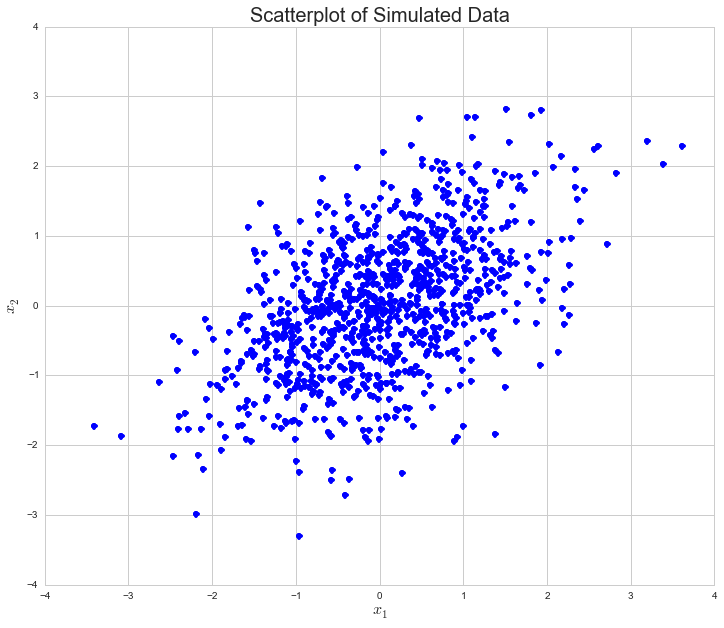

In [13]:
plt.figure(figsize=(12, 10))
plt.plot(x1, x2, 'bo')
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.xlabel(r'$x_1$', fontsize = 16)
plt.ylabel(r'$x_2$', fontsize = 16)
plt.title(r'Scatterplot of Simulated Data', fontsize = 20)

## Prob/Stats Homework

Using R or Python:

1.  Suppose you had two 8-sided dice, and your experiment is toss these two dice 25 times. The random variables are the outcomes on each die from each toss.  Calculate the mean, standard deviation, and correlation of these two random variables.

2.  Generate 1,000 draws from the bivariate normal, setting the correlation coefficient, $\rho$, it to 0, -0.5, 0.8, and 0.99.  Graph the scatter plots, calculate moments, and generate scatterplots.  How does the negative correlation affect your results, in particular the scatterplots?  How does a high correlation affect your results?  

2.  Increase the sample size to 10,000 and repeat 2 above.  How does the larger sample affect your results?  

3.  Return to a sample size of 1,000.  Increase the variances of the random variable $x_1$ to 3 and of the random variable $x_2$ to 5.  Repeat 2 above.  How does the larger variance affect your results?

4.  Are there any general conclusions that you can draw from this exercise?

Submit code and results.

#Question 1

In [15]:
import numpy as np
from numpy import random

die1 = random.random_integers(1, 8, 25)
die2 = random.random_integers(1, 8, 25)
print die1
print die2

print 'die1 mean = ', die1.mean(), '  die1 std = ', die1.std() 
print 'die2 mean = ', die2.mean(), '  die2 std = ', die2.std() 
print 'correlation = ', np.corrcoef(die1, die2)[0, 1]

[5 7 7 2 3 7 7 3 4 2 8 7 7 2 6 5 5 7 8 8 4 2 7 4 4]
[7 1 5 8 7 4 1 4 7 8 2 7 4 2 2 2 5 6 5 6 2 6 4 8 3]
die1 mean =  5.24   die1 std =  2.06455806409
die2 mean =  4.64   die2 std =  2.26061938415
correlation =  -0.315736698929


#Question 2

x1 mean =  -0.0260572370631   x1 std =  0.998580975281
x2 mean =  -0.0334325170296   x2 std =  0.999517996317
correlation =  0.990415557718


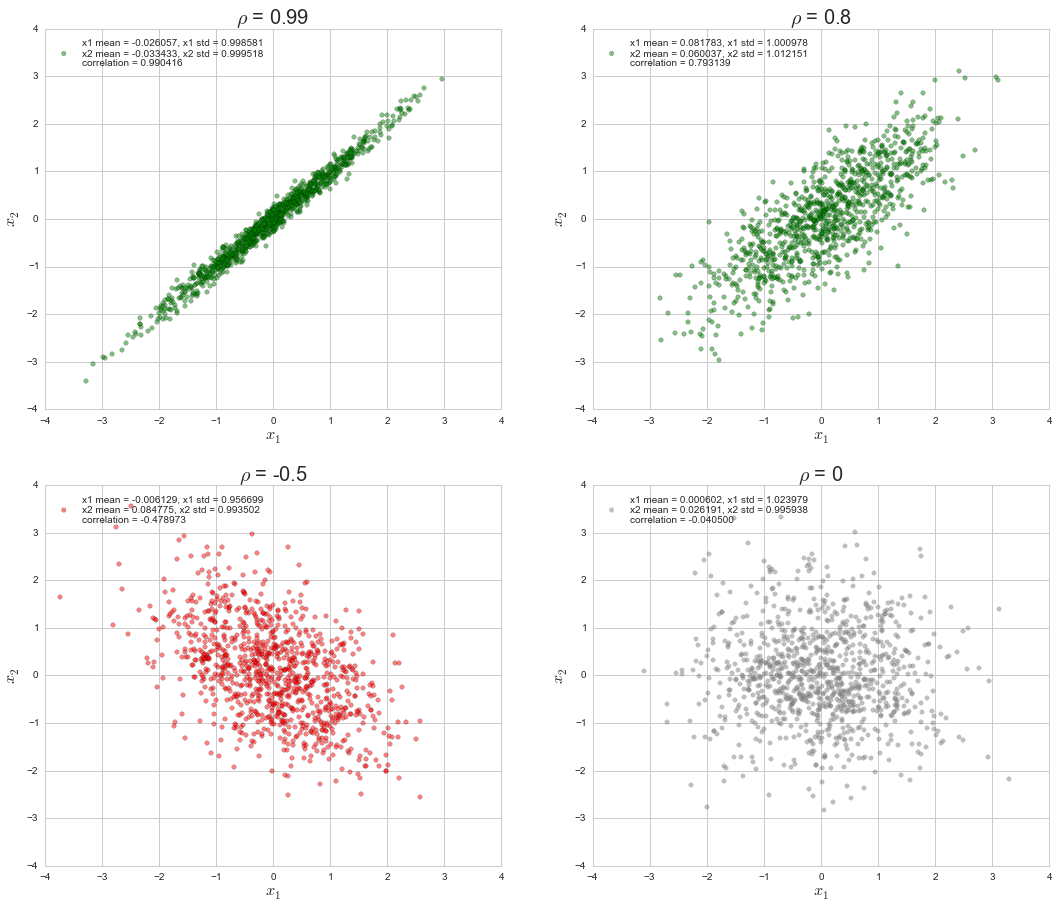

In [106]:
fig = plt.figure(figsize=(18,15))   #create the canvas and subplot it into four parts
ss = 1000 # Sample size of the observed data
mean = [0, 0] # Mean zero

ax = fig.add_subplot(2,2,1)
corr = 0.99 # Correlation
R = np.matrix([[1, corr],[corr, 1]]) 
x1, x2 = np.random.multivariate_normal(mean, R, ss).T # Draw the observed data

print 'x1 mean = ', x1.mean(), '  x1 std = ', x1.std() 
print 'x2 mean = ', x2.mean(), '  x2 std = ', x2.std() 
print 'correlation = ', np.corrcoef(x1, x2)[0, 1]

s = 'x1 mean = %f, x1 std = %f\nx2 mean = %f, x2 std = %f\ncorrelation = %f'%(x1.mean(),x1.std(),x2.mean(),x2.std(),np.corrcoef(x1, x2)[0, 1])

plt.scatter(x1, x2, c = "green", alpha = 0.5, label=s )
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.xlabel(r'$x_1$', fontsize = 16)
plt.ylabel(r'$x_2$', fontsize = 16)
plt.title(r'$\rho$ = 0.99', fontsize = 20)

plt.legend(loc='upper left')

ax1 = fig.add_subplot(2,2,2)
corr = 0.8 # Correlation
R = np.matrix([[1, corr],[corr, 1]]) 
x1, x2 = np.random.multivariate_normal(mean, R, ss).T # Draw the observed data

s = 'x1 mean = %f, x1 std = %f\nx2 mean = %f, x2 std = %f\ncorrelation = %f'%(x1.mean(),x1.std(),x2.mean(),x2.std(),np.corrcoef(x1, x2)[0, 1])

plt.scatter(x1, x2, c = "green", alpha = 0.5, label=s)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.xlabel(r'$x_1$', fontsize = 16)
plt.ylabel(r'$x_2$', fontsize = 16)
plt.title(r'$\rho$ = 0.8', fontsize = 20)

plt.legend(loc='upper left')

ax2 = fig.add_subplot(2,2,3)
corr = -0.5 # Correlation
R = np.matrix([[1, corr],[corr, 1]]) 
x1, x2 = np.random.multivariate_normal(mean, R, ss).T # Draw the observed data

s = 'x1 mean = %f, x1 std = %f\nx2 mean = %f, x2 std = %f\ncorrelation = %f'%(x1.mean(),x1.std(),x2.mean(),x2.std(),np.corrcoef(x1, x2)[0, 1])

plt.scatter(x1, x2,c = 'red', alpha = 0.5, label = s)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.xlabel(r'$x_1$', fontsize = 16)
plt.ylabel(r'$x_2$', fontsize = 16)
plt.title(r'$\rho$ = -0.5', fontsize = 20)

plt.legend(loc='upper left')

ax3 = fig.add_subplot(2,2,4)
corr = 0 # Correlation
R = np.matrix([[1, corr],[corr, 1]]) 
x1, x2 = np.random.multivariate_normal(mean, R, ss).T # Draw the observed data

s = 'x1 mean = %f, x1 std = %f\nx2 mean = %f, x2 std = %f\ncorrelation = %f'%(x1.mean(),x1.std(),x2.mean(),x2.std(),np.corrcoef(x1, x2)[0, 1])

plt.scatter(x1, x2, color = "0.5", alpha=0.5, label = s)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.xlabel(r'$x_1$', fontsize = 16)
plt.ylabel(r'$x_2$', fontsize = 16)
plt.title(r'$\rho$ = 0', fontsize = 20)

plt.legend(loc='upper left')

#Comments for Question 2

The scatterplot of negative $\rho$ differentiates from the others, showing $x_2$ decreases while $x_1$ increases. The higher correlation is, the more centralized and line-like scatterplots become.


#Question 3

x1 mean =  -0.00057428010101   x1 std =  0.989611769637
x2 mean =  -0.000389918568178   x2 std =  0.98990656484
correlation =  0.989714367695
x1 mean =  0.0013991230949   x1 std =  1.00838721208
x2 mean =  -0.00524333036781   x2 std =  1.01328490827
correlation =  0.800839728853
x1 mean =  0.000368717829152   x1 std =  1.0068004167
x2 mean =  -6.45390034581e-05   x2 std =  1.00683309589
correlation =  -0.497856792275
x1 mean =  -0.0154785233661   x1 std =  1.00330216657
x2 mean =  0.00721852446222   x2 std =  0.994104438492
correlation =  0.00282611494498


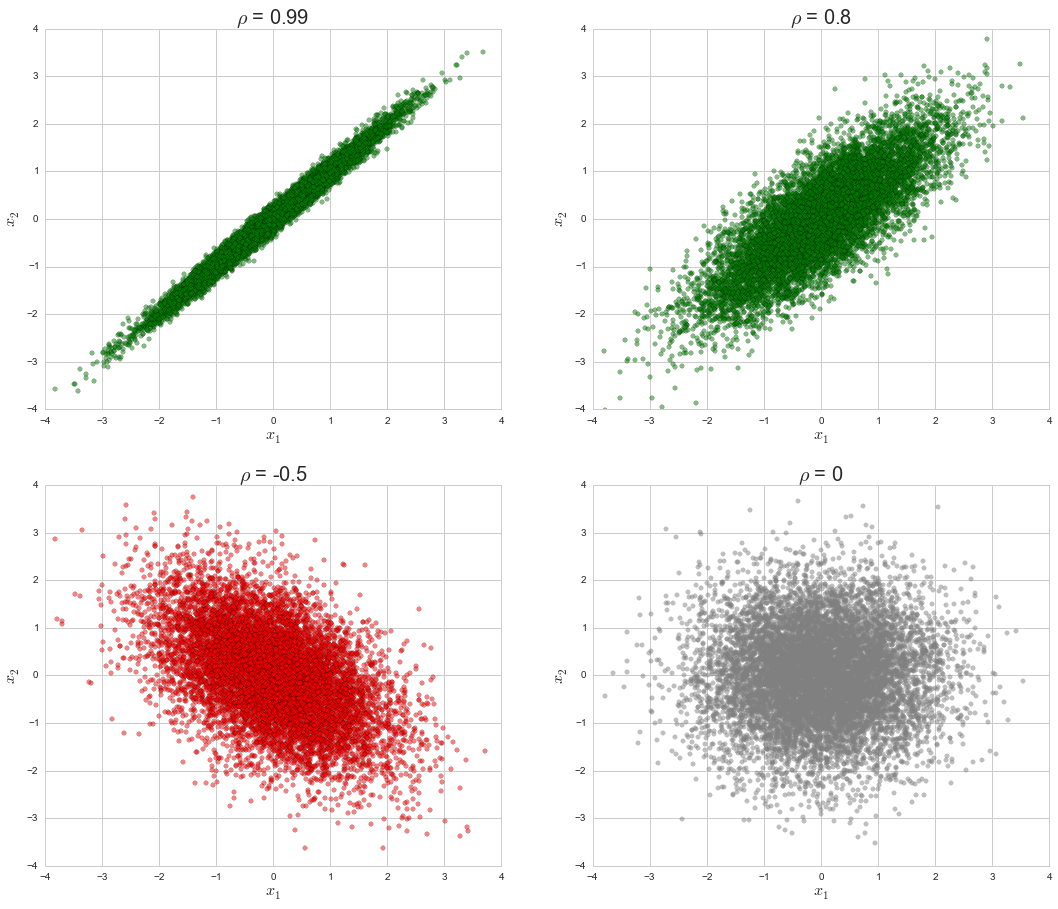

In [107]:
fig = plt.figure(figsize=(18,15))   #create the canvas and subplot it into four parts
ss = 10000 # Sample size of the observed data
mean = [0, 0] # Mean zero

ax = fig.add_subplot(2,2,1)
corr = 0.99 # Correlation
R = np.matrix([[1, corr],[corr, 1]]) 
x1, x2 = np.random.multivariate_normal(mean, R, ss).T # Draw the observed data
print 'x1 mean = ', x1.mean(), '  x1 std = ', x1.std() 
print 'x2 mean = ', x2.mean(), '  x2 std = ', x2.std() 
print 'correlation = ', np.corrcoef(x1, x2)[0, 1]

plt.scatter(x1, x2, c = "green", alpha = 0.5)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.xlabel(r'$x_1$', fontsize = 16)
plt.ylabel(r'$x_2$', fontsize = 16)
plt.title(r'$\rho$ = 0.99', fontsize = 20)

ax1 = fig.add_subplot(2,2,2)
corr = 0.8 # Correlation
R = np.matrix([[1, corr],[corr, 1]]) 
x1, x2 = np.random.multivariate_normal(mean, R, ss).T # Draw the observed data
print 'x1 mean = ', x1.mean(), '  x1 std = ', x1.std() 
print 'x2 mean = ', x2.mean(), '  x2 std = ', x2.std() 
print 'correlation = ', np.corrcoef(x1, x2)[0, 1]

plt.scatter(x1, x2, c = "green", alpha = 0.5)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.xlabel(r'$x_1$', fontsize = 16)
plt.ylabel(r'$x_2$', fontsize = 16)
plt.title(r'$\rho$ = 0.8', fontsize = 20)

ax2 = fig.add_subplot(2,2,3)
corr = -0.5 # Correlation
R = np.matrix([[1, corr],[corr, 1]]) 
x1, x2 = np.random.multivariate_normal(mean, R, ss).T # Draw the observed data
print 'x1 mean = ', x1.mean(), '  x1 std = ', x1.std() 
print 'x2 mean = ', x2.mean(), '  x2 std = ', x2.std() 
print 'correlation = ', np.corrcoef(x1, x2)[0, 1]

plt.scatter(x1, x2,c = 'red', alpha = 0.5)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.xlabel(r'$x_1$', fontsize = 16)
plt.ylabel(r'$x_2$', fontsize = 16)
plt.title(r'$\rho$ = -0.5', fontsize = 20)

ax3 = fig.add_subplot(2,2,4)
corr = 0 # Correlation
R = np.matrix([[1, corr],[corr, 1]]) 
x1, x2 = np.random.multivariate_normal(mean, R, ss).T # Draw the observed data
print 'x1 mean = ', x1.mean(), '  x1 std = ', x1.std() 
print 'x2 mean = ', x2.mean(), '  x2 std = ', x2.std() 
print 'correlation = ', np.corrcoef(x1, x2)[0, 1]

plt.scatter(x1, x2, color = "0.5", alpha=0.5)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.xlabel(r'$x_1$', fontsize = 16)
plt.ylabel(r'$x_2$', fontsize = 16)
plt.title(r'$\rho$ = 0', fontsize = 20)

#Comment for Question 3

In my opinion, there are no clear differences between the two samples based on moments. In other words, adding the sample size from 1,000 to 10,000 is in vain for statistics. There will exit more outliers with huge distance from the mean point or the center area.
 

#Question 4

x1 mean =  0.0193267871067   x1 std =  1.74026410592
x2 mean =  0.063634992385   x2 std =  2.25019658294
correlation =  0.246382301057
x1 mean =  -0.0977532158227   x1 std =  1.76669510078
x2 mean =  -0.0331752072232   x2 std =  2.23752432467
correlation =  0.247479767777
x1 mean =  0.0918863665026   x1 std =  1.7570892473
x2 mean =  -0.0402885246074   x2 std =  2.19424974906
correlation =  -0.135382698315
x1 mean =  0.0303303194792   x1 std =  1.69321501283
x2 mean =  0.113899795222   x2 std =  2.25818212064
correlation =  0.00971924111028


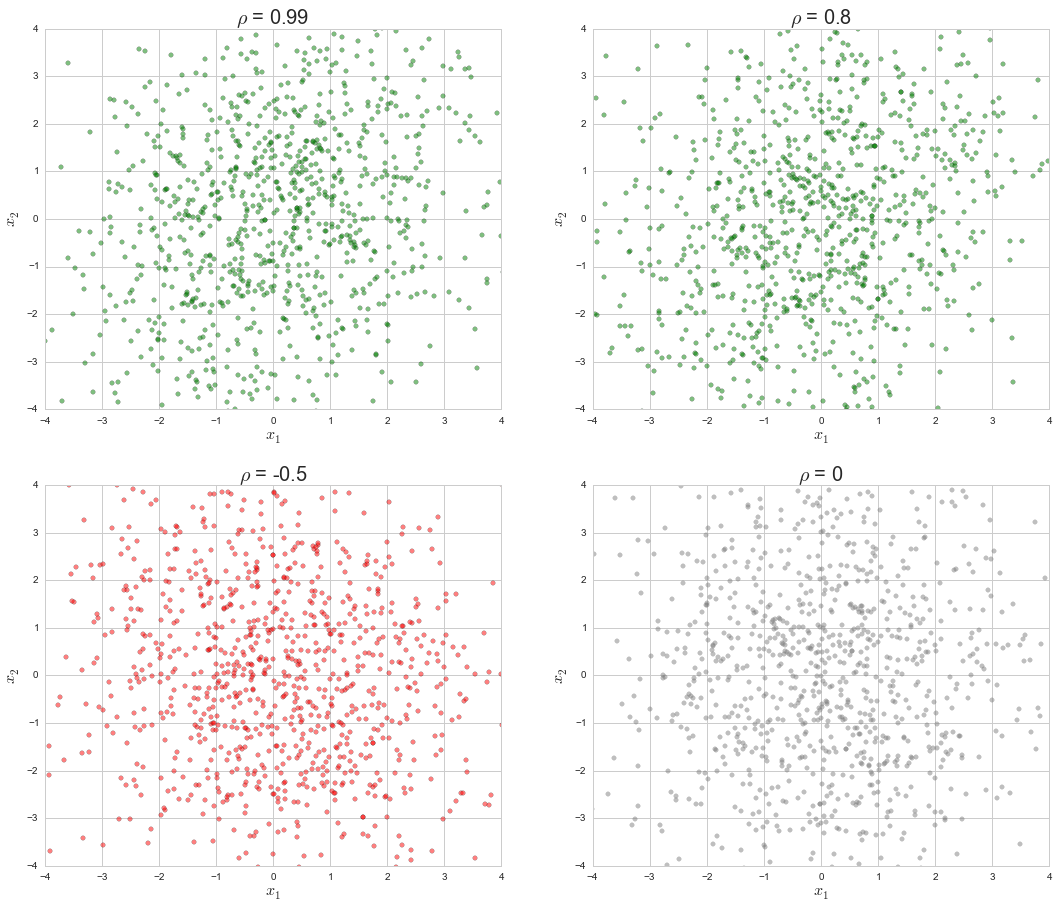

In [108]:
fig = plt.figure(figsize=(18,15))   #create the canvas and subplot it into four parts
ss = 1000 # Sample size of the observed data
mean = [0, 0] # Mean zero

ax = fig.add_subplot(2,2,1)
corr = 0.99 # Correlation
R = np.matrix([[3, corr],[corr, 5]]) 
x1, x2 = np.random.multivariate_normal(mean, R, ss).T # Draw the observed data
print 'x1 mean = ', x1.mean(), '  x1 std = ', x1.std() 
print 'x2 mean = ', x2.mean(), '  x2 std = ', x2.std() 
print 'correlation = ', np.corrcoef(x1, x2)[0, 1]

plt.scatter(x1, x2, c = "green", alpha = 0.5)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.xlabel(r'$x_1$', fontsize = 16)
plt.ylabel(r'$x_2$', fontsize = 16)
plt.title(r'$\rho$ = 0.99', fontsize = 20)

ax1 = fig.add_subplot(2,2,2)
corr = 0.8 # Correlation
R = np.matrix([[3, corr],[corr, 5]]) 
x1, x2 = np.random.multivariate_normal(mean, R, ss).T # Draw the observed data
print 'x1 mean = ', x1.mean(), '  x1 std = ', x1.std() 
print 'x2 mean = ', x2.mean(), '  x2 std = ', x2.std() 
print 'correlation = ', np.corrcoef(x1, x2)[0, 1]

plt.scatter(x1, x2, c = "green", alpha = 0.5)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.xlabel(r'$x_1$', fontsize = 16)
plt.ylabel(r'$x_2$', fontsize = 16)
plt.title(r'$\rho$ = 0.8', fontsize = 20)

ax2 = fig.add_subplot(2,2,3)
corr = -0.5 # Correlation
R = np.matrix([[3, corr],[corr, 5]]) 
x1, x2 = np.random.multivariate_normal(mean, R, ss).T # Draw the observed data
print 'x1 mean = ', x1.mean(), '  x1 std = ', x1.std() 
print 'x2 mean = ', x2.mean(), '  x2 std = ', x2.std() 
print 'correlation = ', np.corrcoef(x1, x2)[0, 1]

plt.scatter(x1, x2,c = 'red', alpha = 0.5)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.xlabel(r'$x_1$', fontsize = 16)
plt.ylabel(r'$x_2$', fontsize = 16)
plt.title(r'$\rho$ = -0.5', fontsize = 20)

ax3 = fig.add_subplot(2,2,4)
corr = 0 # Correlation
R = np.matrix([[3, corr],[corr, 5]]) 
x1, x2 = np.random.multivariate_normal(mean, R, ss).T # Draw the observed data
print 'x1 mean = ', x1.mean(), '  x1 std = ', x1.std() 
print 'x2 mean = ', x2.mean(), '  x2 std = ', x2.std() 
print 'correlation = ', np.corrcoef(x1, x2)[0, 1]

plt.scatter(x1, x2, color = "0.5", alpha=0.5)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.xlabel(r'$x_1$', fontsize = 16)
plt.ylabel(r'$x_2$', fontsize = 16)
plt.title(r'$\rho$ = 0', fontsize = 20)

#Comment for Question 4

As showed above, the scatterplots are stuffed with disperse points and there are no clear correlation even in the first graph. So the high variance of the data itself may cover the correlation between them. But I am still confused with that outcome.

#Answer for Question 5
1. As to the sample size, there is no need to be really BIG. It is enough to obtain the conclusions based on regression if the relation exists. BIG data is not omnipotent.
2. The variance of the data apperantly effect the unvealed correlation with other data. However, even if the correlation do exist, it is non sense with the high uncertainty of the data itself to make prediction based on other indicators.